# Phase 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("footballersdataset.csv", encoding="ISO-8859-1", delimiter=';')

In [ ]:
data.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts',
       ...
       'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'AerWon',
       'AerLost', 'AerWon%'],
      dtype='object', length=124)

## Cleaning Steps

### 1. Filtering data bsed on player position

In [ ]:
data['Pos'].unique()

array(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'GK', 'DFMF',
       'FWDF'], dtype=object)

In [ ]:
filtered_data = data[data['Pos'] == 'MFFW']

# Show the first 5 player names from the filtered data
filtered_data['Player'].count()

208

In [ ]:
data.shape

(2689, 124)

In [ ]:
fw_players = data[data['Pos'].str.contains('FW')]

# Display the first few rows of the filtered data, showing player names and positions
fw_players[['Player', 'Pos']]

,Player,Pos
0,Brenden Aaronson,MFFW
2,Himad Abdelli,MFFW
6,Matthis Abline,FWMF
7,Matthis Abline,FWMF
9,Zakaria Aboukhlal,FWMF
...,...,...
2674,Joshua Zirkzee,FW
2675,Hakim Ziyech,FWMF
2677,Simon Zoller,FW
2687,Milan ?uri?,FW


In [ ]:
fw_players

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.00,0.00,0.0,4.86,0.34,1.19,22.2
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.00,0.00,0.0,8.14,0.93,1.05,47.1
6,7,Matthis Abline,FRA,FWMF,Auxerre,Ligue 1,19,2003,5,2,...,0.48,0.95,0.48,0.00,0.00,0.0,0.48,1.43,1.43,50.0
7,8,Matthis Abline,FRA,FWMF,Rennes,Ligue 1,19,2003,11,0,...,0.83,1.67,0.83,0.83,0.00,0.0,1.67,0.83,3.33,20.0
9,10,Zakaria Aboukhlal,MAR,FWMF,Toulouse,Ligue 1,22,2000,22,17,...,0.72,0.96,0.72,0.00,0.00,0.0,4.43,0.42,1.32,24.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,2675,Joshua Zirkzee,NED,FW,Bologna,Serie A,21,2001,9,4,...,0.19,0.00,0.19,0.00,0.00,0.0,1.92,1.54,2.88,34.8
2675,2676,Hakim Ziyech,MAR,FWMF,Chelsea,Premier League,29,1993,12,5,...,0.53,9.47,1.75,0.00,0.00,0.0,6.14,0.00,0.53,0.0
2677,2678,Simon Zoller,GER,FW,Bochum,Bundesliga,31,1991,18,16,...,0.44,1.19,0.15,0.00,0.07,0.0,3.26,0.96,1.26,43.3
2687,2688,Milan ?uri?,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,...,0.38,0.00,0.13,0.00,0.00,0.0,2.05,14.50,3.59,80.1


### 2. Filtering based on the Age. Above 30 years old.

In [ ]:
young_players_only = fw_players[fw_players['Age'] <= 30]
young_players_only

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.00,0.0,0.0,4.86,0.34,1.19,22.2
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.00,0.0,0.0,8.14,0.93,1.05,47.1
6,7,Matthis Abline,FRA,FWMF,Auxerre,Ligue 1,19,2003,5,2,...,0.48,0.95,0.48,0.00,0.0,0.0,0.48,1.43,1.43,50.0
7,8,Matthis Abline,FRA,FWMF,Rennes,Ligue 1,19,2003,11,0,...,0.83,1.67,0.83,0.83,0.0,0.0,1.67,0.83,3.33,20.0
9,10,Zakaria Aboukhlal,MAR,FWMF,Toulouse,Ligue 1,22,2000,22,17,...,0.72,0.96,0.72,0.00,0.0,0.0,4.43,0.42,1.32,24.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,2666,Arber Zeneli,KVX,FWMF,Reims,Ligue 1,27,1995,18,11,...,0.30,4.20,0.30,0.00,0.0,0.0,5.10,0.30,0.80,27.3
2667,2668,Alessio Zerbin,ITA,FW,Napoli,Serie A,23,1999,4,0,...,1.67,0.00,1.67,0.00,0.0,0.0,1.67,0.00,0.00,0.0
2670,2671,Edon Zhegrova,KVX,FWDF,Lille,Ligue 1,23,1999,12,6,...,0.32,5.24,1.43,0.00,0.0,0.0,5.40,0.00,0.48,0.0
2674,2675,Joshua Zirkzee,NED,FW,Bologna,Serie A,21,2001,9,4,...,0.19,0.00,0.19,0.00,0.0,0.0,1.92,1.54,2.88,34.8


### 3. Include case relevant columnds (feature extraction)

In [ ]:
striker_columns = [
    'Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min',
    'Goals', 'Shots', 'SoT',
    'Assists', 'SCA','ScaDrib', 'Off', 'ToAtt', 'ToSuc',
    'Crs', 'Rec', 'Fls', 'CrdY', 'CrdR'
]

striker_data = young_players_only[striker_columns]

striker_data

,Player,Nation,Pos,Age,MP,Starts,Min,Goals,Shots,SoT,...,SCA,ScaDrib,Off,ToAtt,ToSuc,Crs,Rec,Fls,CrdY,CrdR
0,Brenden Aaronson,USA,MFFW,22,20,19,1596,1,1.53,0.28,...,3.62,0.23,0.17,3.73,1.19,2.54,30.2,0.62,0.11,0.0
2,Himad Abdelli,FRA,MFFW,23,14,8,770,0,1.05,0.35,...,2.67,0.00,0.00,3.84,2.09,1.05,43.4,1.74,0.12,0.0
6,Matthis Abline,FRA,FWMF,19,5,2,185,1,4.29,1.43,...,0.48,0.00,0.48,1.43,0.48,0.95,19.0,0.95,0.00,0.0
7,Matthis Abline,FRA,FWMF,19,11,0,107,1,5.00,1.67,...,5.83,0.00,0.83,0.00,0.00,1.67,22.5,2.50,0.00,0.0
9,Zakaria Aboukhlal,MAR,FWMF,22,22,17,1507,5,2.75,1.02,...,2.34,0.18,0.72,3.17,1.02,0.96,27.1,1.56,0.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,Arber Zeneli,KVX,FWMF,27,18,11,898,0,2.80,0.50,...,4.40,0.60,0.30,5.20,1.50,4.20,36.4,0.70,0.00,0.0
2667,Alessio Zerbin,ITA,FW,23,4,0,55,0,1.67,1.67,...,0.00,0.00,1.67,1.67,1.67,0.00,38.3,6.67,1.67,0.0
2670,Edon Zhegrova,KVX,FWDF,23,12,6,564,1,4.29,1.27,...,5.56,0.48,0.32,6.98,3.02,5.24,46.5,1.27,0.16,0.0
2674,Joshua Zirkzee,NED,FW,21,9,4,464,1,3.08,0.77,...,4.04,0.77,0.19,3.46,1.73,0.00,31.3,0.58,0.19,0.0


### 4, 5, 6: ? , Duplicates, Nan

#### 4. ?

In [ ]:
striker_data_cleaned = striker_data.replace('?', pd.NA)


striker_data_cleaned


,Player,Nation,Pos,Age,MP,Starts,Min,Goals,Shots,SoT,...,SCA,ScaDrib,Off,ToAtt,ToSuc,Crs,Rec,Fls,CrdY,CrdR
0,Brenden Aaronson,USA,MFFW,22,20,19,1596,1,1.53,0.28,...,3.62,0.23,0.17,3.73,1.19,2.54,30.2,0.62,0.11,0.0
2,Himad Abdelli,FRA,MFFW,23,14,8,770,0,1.05,0.35,...,2.67,0.00,0.00,3.84,2.09,1.05,43.4,1.74,0.12,0.0
6,Matthis Abline,FRA,FWMF,19,5,2,185,1,4.29,1.43,...,0.48,0.00,0.48,1.43,0.48,0.95,19.0,0.95,0.00,0.0
7,Matthis Abline,FRA,FWMF,19,11,0,107,1,5.00,1.67,...,5.83,0.00,0.83,0.00,0.00,1.67,22.5,2.50,0.00,0.0
9,Zakaria Aboukhlal,MAR,FWMF,22,22,17,1507,5,2.75,1.02,...,2.34,0.18,0.72,3.17,1.02,0.96,27.1,1.56,0.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,Arber Zeneli,KVX,FWMF,27,18,11,898,0,2.80,0.50,...,4.40,0.60,0.30,5.20,1.50,4.20,36.4,0.70,0.00,0.0
2667,Alessio Zerbin,ITA,FW,23,4,0,55,0,1.67,1.67,...,0.00,0.00,1.67,1.67,1.67,0.00,38.3,6.67,1.67,0.0
2670,Edon Zhegrova,KVX,FWDF,23,12,6,564,1,4.29,1.27,...,5.56,0.48,0.32,6.98,3.02,5.24,46.5,1.27,0.16,0.0
2674,Joshua Zirkzee,NED,FW,21,9,4,464,1,3.08,0.77,...,4.04,0.77,0.19,3.46,1.73,0.00,31.3,0.58,0.19,0.0


#### 5. drop rows for Nan

In [ ]:
striker_data_cleaned = striker_data_cleaned.dropna()
striker_data_cleaned

,Player,Nation,Pos,Age,MP,Starts,Min,Goals,Shots,SoT,...,SCA,ScaDrib,Off,ToAtt,ToSuc,Crs,Rec,Fls,CrdY,CrdR
0,Brenden Aaronson,USA,MFFW,22,20,19,1596,1,1.53,0.28,...,3.62,0.23,0.17,3.73,1.19,2.54,30.2,0.62,0.11,0.0
2,Himad Abdelli,FRA,MFFW,23,14,8,770,0,1.05,0.35,...,2.67,0.00,0.00,3.84,2.09,1.05,43.4,1.74,0.12,0.0
6,Matthis Abline,FRA,FWMF,19,5,2,185,1,4.29,1.43,...,0.48,0.00,0.48,1.43,0.48,0.95,19.0,0.95,0.00,0.0
7,Matthis Abline,FRA,FWMF,19,11,0,107,1,5.00,1.67,...,5.83,0.00,0.83,0.00,0.00,1.67,22.5,2.50,0.00,0.0
9,Zakaria Aboukhlal,MAR,FWMF,22,22,17,1507,5,2.75,1.02,...,2.34,0.18,0.72,3.17,1.02,0.96,27.1,1.56,0.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,Arber Zeneli,KVX,FWMF,27,18,11,898,0,2.80,0.50,...,4.40,0.60,0.30,5.20,1.50,4.20,36.4,0.70,0.00,0.0
2667,Alessio Zerbin,ITA,FW,23,4,0,55,0,1.67,1.67,...,0.00,0.00,1.67,1.67,1.67,0.00,38.3,6.67,1.67,0.0
2670,Edon Zhegrova,KVX,FWDF,23,12,6,564,1,4.29,1.27,...,5.56,0.48,0.32,6.98,3.02,5.24,46.5,1.27,0.16,0.0
2674,Joshua Zirkzee,NED,FW,21,9,4,464,1,3.08,0.77,...,4.04,0.77,0.19,3.46,1.73,0.00,31.3,0.58,0.19,0.0


#### Drop duplicates

In [ ]:
striker_data_cleaned = striker_data_cleaned.drop_duplicates()
striker_data_cleaned

,Player,Nation,Pos,Age,MP,Starts,Min,Goals,Shots,SoT,...,SCA,ScaDrib,Off,ToAtt,ToSuc,Crs,Rec,Fls,CrdY,CrdR
0,Brenden Aaronson,USA,MFFW,22,20,19,1596,1,1.53,0.28,...,3.62,0.23,0.17,3.73,1.19,2.54,30.2,0.62,0.11,0.0
2,Himad Abdelli,FRA,MFFW,23,14,8,770,0,1.05,0.35,...,2.67,0.00,0.00,3.84,2.09,1.05,43.4,1.74,0.12,0.0
6,Matthis Abline,FRA,FWMF,19,5,2,185,1,4.29,1.43,...,0.48,0.00,0.48,1.43,0.48,0.95,19.0,0.95,0.00,0.0
7,Matthis Abline,FRA,FWMF,19,11,0,107,1,5.00,1.67,...,5.83,0.00,0.83,0.00,0.00,1.67,22.5,2.50,0.00,0.0
9,Zakaria Aboukhlal,MAR,FWMF,22,22,17,1507,5,2.75,1.02,...,2.34,0.18,0.72,3.17,1.02,0.96,27.1,1.56,0.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,Arber Zeneli,KVX,FWMF,27,18,11,898,0,2.80,0.50,...,4.40,0.60,0.30,5.20,1.50,4.20,36.4,0.70,0.00,0.0
2667,Alessio Zerbin,ITA,FW,23,4,0,55,0,1.67,1.67,...,0.00,0.00,1.67,1.67,1.67,0.00,38.3,6.67,1.67,0.0
2670,Edon Zhegrova,KVX,FWDF,23,12,6,564,1,4.29,1.27,...,5.56,0.48,0.32,6.98,3.02,5.24,46.5,1.27,0.16,0.0
2674,Joshua Zirkzee,NED,FW,21,9,4,464,1,3.08,0.77,...,4.04,0.77,0.19,3.46,1.73,0.00,31.3,0.58,0.19,0.0


In [ ]:
striker_data_cleaned.shape

(788, 21)

### This one will be on Latex.
### ERROR: The minutes are total of the season and cannot be normalise to 90 min accurately.

In [ ]:
striker_data_normalised = pd.DataFrame(striker_data_cleaned)

striker_data_normalised['Normalized_Min'] = striker_data_normalised['Min'].apply(lambda x: x / 90)

striker_data_normalised

,Player,Nation,Pos,Age,MP,Starts,Min,Goals,Shots,SoT,...,ScaDrib,Off,ToAtt,ToSuc,Crs,Rec,Fls,CrdY,CrdR,Normalized_Min
0,Brenden Aaronson,USA,MFFW,22,20,19,1596,1,1.53,0.28,...,0.23,0.17,3.73,1.19,2.54,30.2,0.62,0.11,0.0,17.733333
2,Himad Abdelli,FRA,MFFW,23,14,8,770,0,1.05,0.35,...,0.00,0.00,3.84,2.09,1.05,43.4,1.74,0.12,0.0,8.555556
6,Matthis Abline,FRA,FWMF,19,5,2,185,1,4.29,1.43,...,0.00,0.48,1.43,0.48,0.95,19.0,0.95,0.00,0.0,2.055556
7,Matthis Abline,FRA,FWMF,19,11,0,107,1,5.00,1.67,...,0.00,0.83,0.00,0.00,1.67,22.5,2.50,0.00,0.0,1.188889
9,Zakaria Aboukhlal,MAR,FWMF,22,22,17,1507,5,2.75,1.02,...,0.18,0.72,3.17,1.02,0.96,27.1,1.56,0.18,0.0,16.744444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,Arber Zeneli,KVX,FWMF,27,18,11,898,0,2.80,0.50,...,0.60,0.30,5.20,1.50,4.20,36.4,0.70,0.00,0.0,9.977778
2667,Alessio Zerbin,ITA,FW,23,4,0,55,0,1.67,1.67,...,0.00,1.67,1.67,1.67,0.00,38.3,6.67,1.67,0.0,0.611111
2670,Edon Zhegrova,KVX,FWDF,23,12,6,564,1,4.29,1.27,...,0.48,0.32,6.98,3.02,5.24,46.5,1.27,0.16,0.0,6.266667
2674,Joshua Zirkzee,NED,FW,21,9,4,464,1,3.08,0.77,...,0.77,0.19,3.46,1.73,0.00,31.3,0.58,0.19,0.0,5.155556


### 7. Check for negative values


negative_values = striker_data[(striker_data['Goals'] < 0) |
                               (striker_data['Shots'] < 0) |
                               (striker_data['Assists'] < 0) |
                               (striker_data['SoT'] < 0)]
print(negative_values)

In [ ]:
negative_values = striker_data_cleaned[(striker_data['Goals'] > 0) |
                               (striker_data['Shots'] > 0) |
                               (striker_data['Assists'] > 0) |
                               (striker_data['Starts'] > 0) |
                                (striker_data['MP'] > 0)]
negative_values

<ipython-input-16-831734434640>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  negative_values = striker_data_cleaned[(striker_data['Goals'] > 0) |


,Player,Nation,Pos,Age,MP,Starts,Min,Goals,Shots,SoT,...,SCA,ScaDrib,Off,ToAtt,ToSuc,Crs,Rec,Fls,CrdY,CrdR
0,Brenden Aaronson,USA,MFFW,22,20,19,1596,1,1.53,0.28,...,3.62,0.23,0.17,3.73,1.19,2.54,30.2,0.62,0.11,0.0
2,Himad Abdelli,FRA,MFFW,23,14,8,770,0,1.05,0.35,...,2.67,0.00,0.00,3.84,2.09,1.05,43.4,1.74,0.12,0.0
6,Matthis Abline,FRA,FWMF,19,5,2,185,1,4.29,1.43,...,0.48,0.00,0.48,1.43,0.48,0.95,19.0,0.95,0.00,0.0
7,Matthis Abline,FRA,FWMF,19,11,0,107,1,5.00,1.67,...,5.83,0.00,0.83,0.00,0.00,1.67,22.5,2.50,0.00,0.0
9,Zakaria Aboukhlal,MAR,FWMF,22,22,17,1507,5,2.75,1.02,...,2.34,0.18,0.72,3.17,1.02,0.96,27.1,1.56,0.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,Arber Zeneli,KVX,FWMF,27,18,11,898,0,2.80,0.50,...,4.40,0.60,0.30,5.20,1.50,4.20,36.4,0.70,0.00,0.0
2667,Alessio Zerbin,ITA,FW,23,4,0,55,0,1.67,1.67,...,0.00,0.00,1.67,1.67,1.67,0.00,38.3,6.67,1.67,0.0
2670,Edon Zhegrova,KVX,FWDF,23,12,6,564,1,4.29,1.27,...,5.56,0.48,0.32,6.98,3.02,5.24,46.5,1.27,0.16,0.0
2674,Joshua Zirkzee,NED,FW,21,9,4,464,1,3.08,0.77,...,4.04,0.77,0.19,3.46,1.73,0.00,31.3,0.58,0.19,0.0


### 8. Outlier Detection: Some players has an exceptional technics and scoring ability that makes them outlier compare to the rest. For example, we have Cristiano Ronaldo, Erling Haaland ..etc.

In [ ]:
outliers = None
for columns in ['Goals', 'Assists', 'Shots']:
  Q1 = negative_values[columns].quantile(0.25)
  Q3 = negative_values[columns].quantile(0.75)

  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 - 1.5 * IQR

  outliers = negative_values[(negative_values[columns] < lower_bound) | negative_values[columns] > upper_bound]

outliers = pd.DataFrame(outliers)

In [ ]:
outliers

,Player,Nation,Pos,Age,MP,Starts,Min,Goals,Shots,SoT,...,SCA,ScaDrib,Off,ToAtt,ToSuc,Crs,Rec,Fls,CrdY,CrdR
0,Brenden Aaronson,USA,MFFW,22,20,19,1596,1,1.53,0.28,...,3.62,0.23,0.17,3.73,1.19,2.54,30.2,0.62,0.11,0.0
2,Himad Abdelli,FRA,MFFW,23,14,8,770,0,1.05,0.35,...,2.67,0.00,0.00,3.84,2.09,1.05,43.4,1.74,0.12,0.0
6,Matthis Abline,FRA,FWMF,19,5,2,185,1,4.29,1.43,...,0.48,0.00,0.48,1.43,0.48,0.95,19.0,0.95,0.00,0.0
7,Matthis Abline,FRA,FWMF,19,11,0,107,1,5.00,1.67,...,5.83,0.00,0.83,0.00,0.00,1.67,22.5,2.50,0.00,0.0
9,Zakaria Aboukhlal,MAR,FWMF,22,22,17,1507,5,2.75,1.02,...,2.34,0.18,0.72,3.17,1.02,0.96,27.1,1.56,0.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,Arber Zeneli,KVX,FWMF,27,18,11,898,0,2.80,0.50,...,4.40,0.60,0.30,5.20,1.50,4.20,36.4,0.70,0.00,0.0
2667,Alessio Zerbin,ITA,FW,23,4,0,55,0,1.67,1.67,...,0.00,0.00,1.67,1.67,1.67,0.00,38.3,6.67,1.67,0.0
2670,Edon Zhegrova,KVX,FWDF,23,12,6,564,1,4.29,1.27,...,5.56,0.48,0.32,6.98,3.02,5.24,46.5,1.27,0.16,0.0
2674,Joshua Zirkzee,NED,FW,21,9,4,464,1,3.08,0.77,...,4.04,0.77,0.19,3.46,1.73,0.00,31.3,0.58,0.19,0.0


### 9. Imputing NaNs in relevant columns with 0s


In [ ]:
outliers['Goals'] = outliers['Goals'].fillna(0)
outliers['Assists'] = outliers['Assists'].fillna(0)
outliers['Shots'] = outliers['Shots'].fillna(0)

In [ ]:
outliers

,Player,Nation,Pos,Age,MP,Starts,Min,Goals,Shots,SoT,...,SCA,ScaDrib,Off,ToAtt,ToSuc,Crs,Rec,Fls,CrdY,CrdR
0,Brenden Aaronson,USA,MFFW,22,20,19,1596,1,1.53,0.28,...,3.62,0.23,0.17,3.73,1.19,2.54,30.2,0.62,0.11,0.0
2,Himad Abdelli,FRA,MFFW,23,14,8,770,0,1.05,0.35,...,2.67,0.00,0.00,3.84,2.09,1.05,43.4,1.74,0.12,0.0
6,Matthis Abline,FRA,FWMF,19,5,2,185,1,4.29,1.43,...,0.48,0.00,0.48,1.43,0.48,0.95,19.0,0.95,0.00,0.0
7,Matthis Abline,FRA,FWMF,19,11,0,107,1,5.00,1.67,...,5.83,0.00,0.83,0.00,0.00,1.67,22.5,2.50,0.00,0.0
9,Zakaria Aboukhlal,MAR,FWMF,22,22,17,1507,5,2.75,1.02,...,2.34,0.18,0.72,3.17,1.02,0.96,27.1,1.56,0.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,Arber Zeneli,KVX,FWMF,27,18,11,898,0,2.80,0.50,...,4.40,0.60,0.30,5.20,1.50,4.20,36.4,0.70,0.00,0.0
2667,Alessio Zerbin,ITA,FW,23,4,0,55,0,1.67,1.67,...,0.00,0.00,1.67,1.67,1.67,0.00,38.3,6.67,1.67,0.0
2670,Edon Zhegrova,KVX,FWDF,23,12,6,564,1,4.29,1.27,...,5.56,0.48,0.32,6.98,3.02,5.24,46.5,1.27,0.16,0.0
2674,Joshua Zirkzee,NED,FW,21,9,4,464,1,3.08,0.77,...,4.04,0.77,0.19,3.46,1.73,0.00,31.3,0.58,0.19,0.0


### 10. check for incosetency, players names appearing more than once with different format.

In [ ]:
outliers.shape

(695, 21)

In [ ]:
outliers['Player'].nunique()

656

#### So far we can see there are duplicated players.

In [ ]:
duplicates = outliers[outliers.duplicated(subset=['Player'], keep=False)]
duplicates

,Player,Nation,Pos,Age,MP,Starts,Min,Goals,Shots,SoT,...,SCA,ScaDrib,Off,ToAtt,ToSuc,Crs,Rec,Fls,CrdY,CrdR
6,Matthis Abline,FRA,FWMF,19,5,2,185,1,4.29,1.43,...,0.48,0.00,0.48,1.43,0.48,0.95,19.0,0.95,0.00,0.0
7,Matthis Abline,FRA,FWMF,19,11,0,107,1,5.00,1.67,...,5.83,0.00,0.83,0.00,0.00,1.67,22.5,2.50,0.00,0.0
40,Ludovic Ajorque,FRA,FW,28,13,9,771,1,2.56,0.81,...,2.56,0.00,0.12,0.47,0.23,0.00,30.5,1.63,0.12,0.0
41,Ludovic Ajorque,FRA,FW,28,4,3,231,0,2.69,0.77,...,3.08,0.00,0.38,0.77,0.38,0.38,33.5,2.31,0.38,0.0
237,Youcef Belaïli,ALG,MFFW,30,12,10,780,5,2.18,0.69,...,3.79,0.23,0.46,4.14,1.72,3.68,34.3,1.72,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,Tetê,BRA,FWMF,22,17,14,1107,6,2.44,1.06,...,2.44,0.16,0.41,4.31,1.63,3.66,39.2,0.81,0.24,0.0
2440,Karl Toko Ekambi,CMR,FWMF,30,2,2,143,0,1.25,0.63,...,1.25,0.00,0.00,2.50,1.25,0.00,18.1,0.63,0.00,0.0
2441,Karl Toko Ekambi,CMR,FWMF,30,19,15,1353,4,2.73,1.27,...,3.13,0.27,0.13,3.53,1.73,1.67,41.7,0.53,0.07,0.0
2477,Leandro Trossard,BEL,FW,28,3,0,70,1,5.00,2.50,...,5.00,0.00,0.00,7.50,5.00,8.75,42.5,2.50,0.00,0.0


In [ ]:
duplicates_grouped = duplicates.groupby('Player').agg(list)


In [ ]:
duplicates_grouped

,Nation,Pos,Age,MP,Starts,Min,Goals,Shots,SoT,Assists,SCA,ScaDrib,Off,ToAtt,ToSuc,Crs,Rec,Fls,CrdY,CrdR
Player,,,,,,,,,,,,,,,,,,,,
Adam Ounas,"[ALG, ALG]","[FW, FW]","[26, 26]","[2, 13]","[0, 9]","[15, 784]","[0, 1]","[5.0, 2.41]","[0.0, 0.92]","[0.0, 0.11]","[10.0, 5.29]","[5.0, 0.34]","[0.0, 0.23]","[10.0, 7.7]","[10.0, 3.33]","[0.0, 6.9]","[85.0, 45.1]","[0.0, 1.49]","[0.0, 0.11]","[0.0, 0.0]"
Adri Embarba,"[ESP, ESP]","[FWMF, FW]","[30, 30]","[16, 1]","[9, 0]","[786, 35]","[1, 0]","[2.53, 5.0]","[0.92, 0.0]","[0.34, 0.0]","[3.91, 5.0]","[0.46, 5.0]","[0.8, 0.0]","[6.78, 10.0]","[2.64, 5.0]","[8.05, 5.0]","[31.1, 15.0]","[1.38, 2.5]","[0.57, 0.0]","[0.11, 0.0]"
Alexander Isak,"[SWE, SWE]","[FW, FW]","[23, 23]","[6, 2]","[4, 2]","[374, 152]","[3, 1]","[2.62, 1.76]","[1.9, 0.59]","[0.0, 0.0]","[2.14, 1.18]","[0.0, 0.0]","[0.71, 0.0]","[3.33, 2.94]","[0.95, 1.18]","[0.0, 1.18]","[21.2, 19.4]","[1.19, 0.59]","[0.0, 0.0]","[0.0, 0.0]"
Alexis Claude-Maurice,"[FRA, FRA]","[FW, MFFW]","[24, 24]","[2, 13]","[1, 4]","[64, 448]","[0, 2]","[2.86, 1.8]","[0.0, 0.8]","[0.0, 0.4]","[4.29, 2.6]","[0.0, 0.2]","[0.0, 0.0]","[0.0, 4.0]","[0.0, 1.2]","[1.43, 1.2]","[35.7, 39.0]","[0.0, 1.0]","[0.0, 0.0]","[0.0, 0.0]"
Amine Gouiri,"[FRA, FRA]","[FWMF, FW]","[22, 22]","[3, 17]","[3, 17]","[226, 1356]","[0, 9]","[2.0, 2.85]","[0.8, 1.46]","[0.0, 0.07]","[2.8, 3.71]","[0.0, 0.33]","[0.0, 0.46]","[1.2, 2.52]","[0.0, 1.13]","[2.4, 0.46]","[31.6, 25.8]","[0.8, 1.26]","[0.0, 0.07]","[0.0, 0.0]"
Anthony Gordon,"[ENG, ENG]","[MFFW, FW]","[21, 21]","[2, 16]","[0, 12]","[77, 1095]","[0, 3]","[3.33, 2.13]","[0.0, 1.31]","[0.0, 0.0]","[4.44, 1.89]","[0.0, 0.08]","[0.0, 0.25]","[2.22, 3.69]","[1.11, 0.9]","[0.0, 2.05]","[42.2, 23.8]","[2.22, 1.64]","[1.11, 0.49]","[0.0, 0.0]"
Arkadiusz Milik,"[POL, POL]","[FW, FW]","[28, 28]","[17, 2]","[10, 2]","[986, 129]","[6, 0]","[2.64, 0.71]","[1.45, 0.0]","[0.09, 0.0]","[1.82, 0.0]","[0.0, 0.0]","[0.27, 0.71]","[0.91, 0.71]","[0.45, 0.0]","[0.36, 0.0]","[27.2, 25.7]","[1.09, 2.86]","[0.27, 0.71]","[0.09, 0.0]"
Armand Lauriente,"[FRA, FRA]","[FW, FW]","[24, 24]","[15, 3]","[15, 3]","[1224, 266]","[4, 1]","[2.65, 4.67]","[1.18, 1.67]","[0.22, 0.0]","[4.56, 6.33]","[0.37, 0.67]","[0.22, 0.33]","[4.78, 5.67]","[1.91, 4.67]","[5.29, 2.0]","[34.3, 29.0]","[0.81, 0.67]","[0.37, 0.0]","[0.07, 0.0]"
Ayoze Pérez,"[ESP, ESP]","[MFFW, FW]","[29, 29]","[8, 2]","[3, 0]","[382, 41]","[0, 0]","[1.9, 2.0]","[0.48, 0.0]","[0.24, 0.0]","[3.33, 2.0]","[0.0, 0.0]","[0.0, 2.0]","[5.0, 0.0]","[1.43, 0.0]","[4.05, 0.0]","[36.9, 26.0]","[1.67, 0.0]","[0.0, 0.0]","[0.0, 0.0]"


In [ ]:
## Pick columns with numerical values with
#duplicated players to be averaged while words like nations to be the first occurences
duplicates_grouped.columns

Index(['Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', 'Goals', 'Shots', 'SoT',
       'Assists', 'SCA', 'ScaDrib', 'Off', 'ToAtt', 'ToSuc', 'Crs', 'Rec',
       'Fls', 'CrdY', 'CrdR'],
      dtype='object')

In [ ]:
aggregation_rules = {
    'Nation': 'first',
    'Pos': 'first',
    'Age': 'first',
    'MP': 'sum',
    'Starts': 'sum',
    'Min': 'sum',
    'Goals': 'sum',
    'Shots': 'mean',
    'SoT': 'mean',
    'Assists': 'sum',
    'SCA': 'sum',
    'ScaDrib': 'sum',
    'Off': 'sum',
    'ToAtt': 'sum',
    'ToSuc': 'sum',
    'Crs': 'sum',
    'Rec': 'mean',
    'Fls': 'sum',
    'CrdY': 'sum',
    'CrdR': 'sum'
}

cleaned_data = outliers.groupby('Player').agg(aggregation_rules).reset_index()

print(cleaned_data)


                    Player Nation   Pos  Age  MP  Starts   Min  Goals  Shots  \
0            Abdallah Sima    SEN    FW   21  18      10   931      2   2.33   
1        Abdelhamid Sabiri    MAR  MFFW   26  13      11   914      1   2.45   
2    Abdessamad Ezzalzouli    MAR  FWMF   21  14       8   588      0   2.15   
3       Abdoul Kader Bamba    FRA  FWMF   28   4       1    78      0   1.11   
4              Abdón Prats    ESP  FWMF   30  14       1   176      1   3.00   
..                     ...    ...   ...  ...  ..     ...   ...    ...    ...   
651          Álvaro Morata    ESP    FW   30  20      15  1159      7   3.02   
652           Ángel Correa    ARG  MFFW   27  19       8   821      5   3.19   
653                Éderson    BRA  MFFW   23  19      12  1080      1   1.75   
654            Érik Lamela    ARG  FWMF   30  18      12  1217      3   2.15   
655          Óliver Torres    ESP  MFFW   28  19      19  1402      3   1.03   

      SoT  ...   SCA  ScaDrib   Off  To

In [ ]:
cleaned_data

,Player,Nation,Pos,Age,MP,Starts,Min,Goals,Shots,SoT,...,SCA,ScaDrib,Off,ToAtt,ToSuc,Crs,Rec,Fls,CrdY,CrdR
0,Abdallah Sima,SEN,FW,21,18,10,931,2,2.33,0.49,...,2.04,0.00,0.58,1.65,0.49,0.87,20.0,1.84,0.00,0.00
1,Abdelhamid Sabiri,MAR,MFFW,26,13,11,914,1,2.45,0.78,...,3.43,0.29,0.00,3.53,1.08,4.71,36.0,2.25,0.39,0.00
2,Abdessamad Ezzalzouli,MAR,FWMF,21,14,8,588,0,2.15,0.62,...,3.08,0.31,0.00,5.69,2.15,3.23,36.3,2.15,0.46,0.15
3,Abdoul Kader Bamba,FRA,FWMF,28,4,1,78,0,1.11,1.11,...,3.33,0.00,1.11,1.11,0.00,3.33,44.4,3.33,0.00,1.11
4,Abdón Prats,ESP,FWMF,30,14,1,176,1,3.00,2.00,...,0.50,0.00,0.50,2.00,0.50,0.00,25.0,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,Álvaro Morata,ESP,FW,30,20,15,1159,7,3.02,1.40,...,2.33,0.16,1.40,1.55,0.85,0.23,25.3,1.71,0.23,0.00
652,Ángel Correa,ARG,MFFW,27,19,8,821,5,3.19,1.21,...,4.29,0.33,0.55,3.63,1.43,1.98,37.6,0.99,0.22,0.00
653,Éderson,BRA,MFFW,23,19,12,1080,1,1.75,0.42,...,2.25,0.08,0.00,2.08,0.83,0.92,36.3,1.25,0.17,0.00
654,Érik Lamela,ARG,FWMF,30,18,12,1217,3,2.15,1.04,...,4.00,0.15,0.52,3.56,1.19,1.56,39.0,3.56,0.52,0.07


In [ ]:
cleaned_data.shape

(656, 21)

## Exploratory Data Analysis

1. Filtering data bsed on player position

In [ ]:
fw_players.shape

(929, 124)

In [ ]:
fw_players.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.00,0.0,0.0,4.86,0.34,1.19,22.2
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.00,0.0,0.0,8.14,0.93,1.05,47.1
6,7,Matthis Abline,FRA,FWMF,Auxerre,Ligue 1,19,2003,5,2,...,0.48,0.95,0.48,0.00,0.0,0.0,0.48,1.43,1.43,50.0
7,8,Matthis Abline,FRA,FWMF,Rennes,Ligue 1,19,2003,11,0,...,0.83,1.67,0.83,0.83,0.0,0.0,1.67,0.83,3.33,20.0
9,10,Zakaria Aboukhlal,MAR,FWMF,Toulouse,Ligue 1,22,2000,22,17,...,0.72,0.96,0.72,0.00,0.0,0.0,4.43,0.42,1.32,24.1


In [ ]:
fw_players.describe(include='all')

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,929.000000,929,928,929,929,929,929.000000,929.000000,929.000000,929.000000,...,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000
unique,NaN,871,89,5,98,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Siriki Dembélé,ESP,FW,Angers,Premier League,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,124,409,15,203,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1328.787944,NaN,NaN,NaN,NaN,NaN,25.483315,1996.670614,11.837460,7.019376,...,0.464575,1.997051,0.838568,0.020753,0.007847,0.000280,4.198493,1.426039,2.157320,33.552960
std,768.728101,NaN,NaN,NaN,NaN,NaN,4.471894,4.477820,6.793955,6.525782,...,0.780799,2.401726,1.307769,0.068786,0.086219,0.004949,2.773017,2.011364,2.266244,22.541208
min,1.000000,NaN,NaN,NaN,NaN,NaN,15.000000,1981.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,682.000000,NaN,NaN,NaN,NaN,NaN,22.000000,1994.000000,5.000000,1.000000,...,0.000000,0.300000,0.190000,0.000000,0.000000,0.000000,2.530000,0.270000,0.800000,20.000000
50%,1300.000000,NaN,NaN,NaN,NaN,NaN,25.000000,1997.000000,13.000000,5.000000,...,0.280000,1.180000,0.570000,0.000000,0.000000,0.000000,3.980000,0.820000,1.540000,33.300000
75%,1964.000000,NaN,NaN,NaN,NaN,NaN,28.000000,2000.000000,18.000000,12.000000,...,0.630000,2.860000,1.030000,0.000000,0.000000,0.000000,5.240000,1.830000,2.900000,48.000000


### Picking Forward Players

<Axes: title={'center': 'Count of Players by Position'}, xlabel='Pos'>

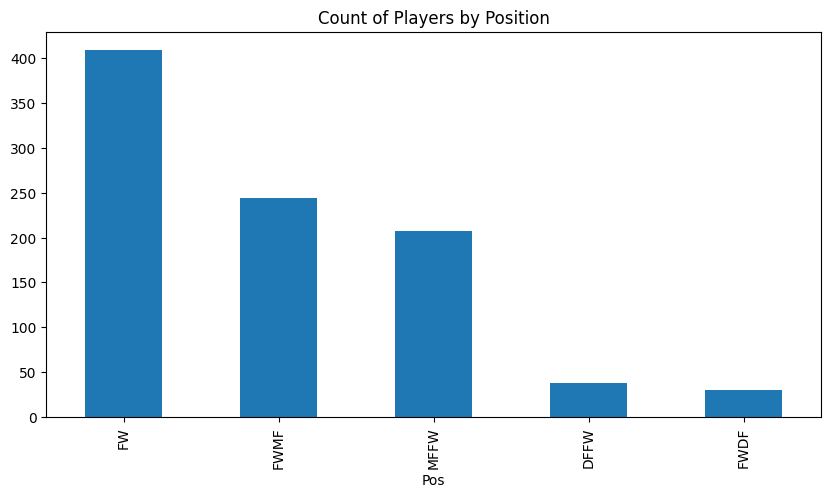

In [ ]:
position_counts = fw_players['Pos'].value_counts()
position_counts.plot(kind='bar', title='Count of Players by Position', figsize=(10, 5))


### Young Players only up to 30 years old.

##### Players above 30 years of age tend to experience a decline in performance. We filtered out players older than 30 to focus on players who are likely at the peak of their athletic performance.

Text(0.5, 1.0, 'Age Distribution of Forward Players')

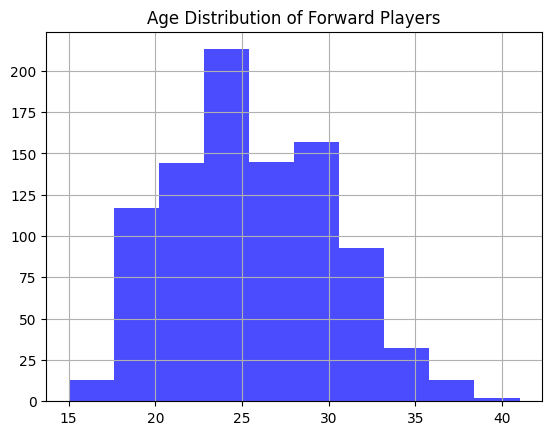

In [ ]:
fw_players['Age'].hist(bins=10, alpha=0.7, color='blue')
plt.title('Age Distribution of Forward Players')


### Features extraction

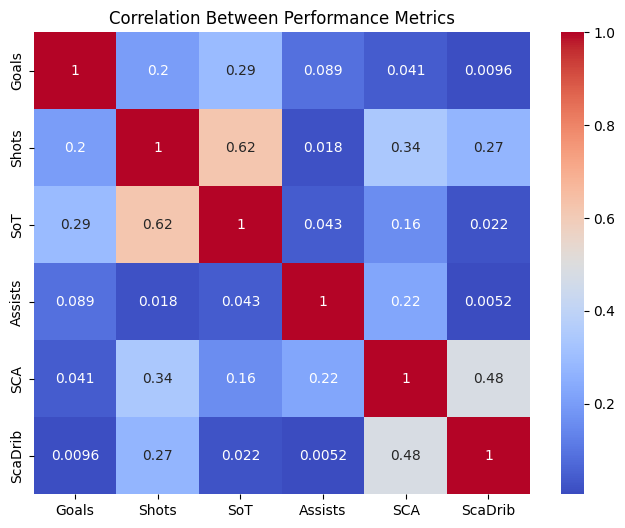

In [ ]:
plt.figure(figsize=(8, 6))
correlation = striker_data[['Goals', 'Shots', 'SoT', 'Assists', 'SCA', 'ScaDrib']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Performance Metrics')
plt.show()


### Detection of the outliers.

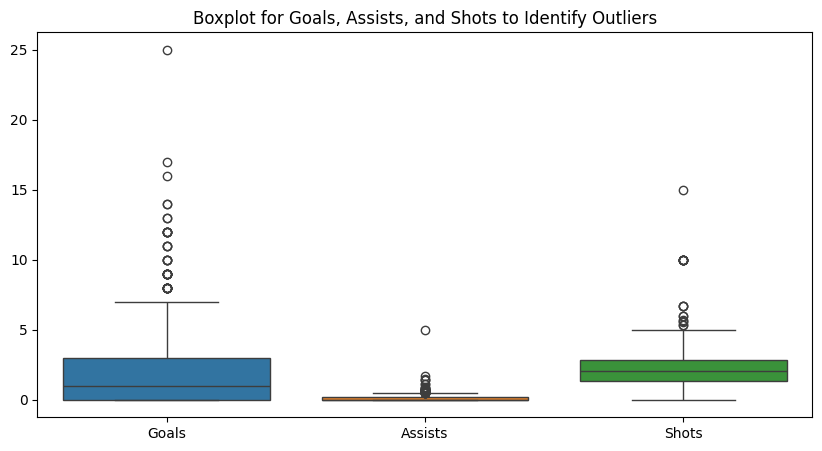

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=negative_values[['Goals', 'Assists', 'Shots']])
plt.title('Boxplot for Goals, Assists, and Shots to Identify Outliers')
plt.show()

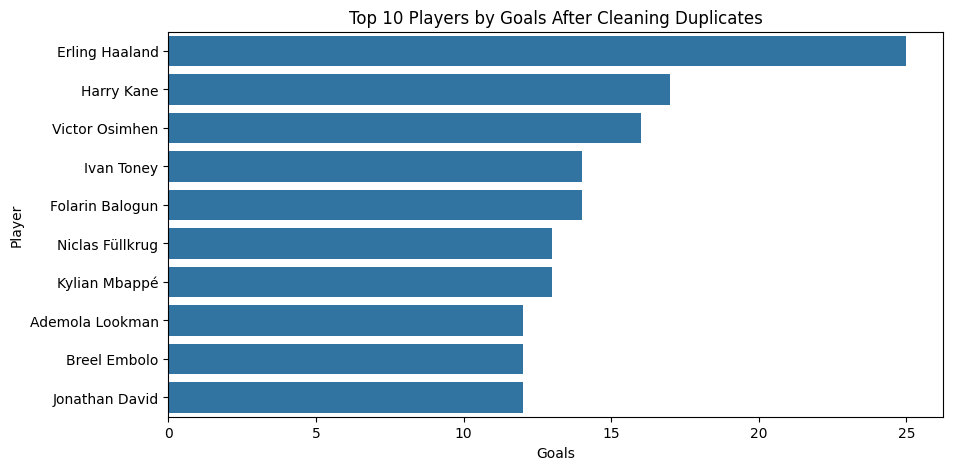

In [ ]:
top_scorers_cleaned = cleaned_data[['Player', 'Goals']].sort_values(by='Goals', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x='Goals', y='Player', data=top_scorers_cleaned)
plt.title('Top 10 Players by Goals After Cleaning Duplicates')
plt.xlabel('Goals')
plt.ylabel('Player')
plt.show()

### Goals vs Assists

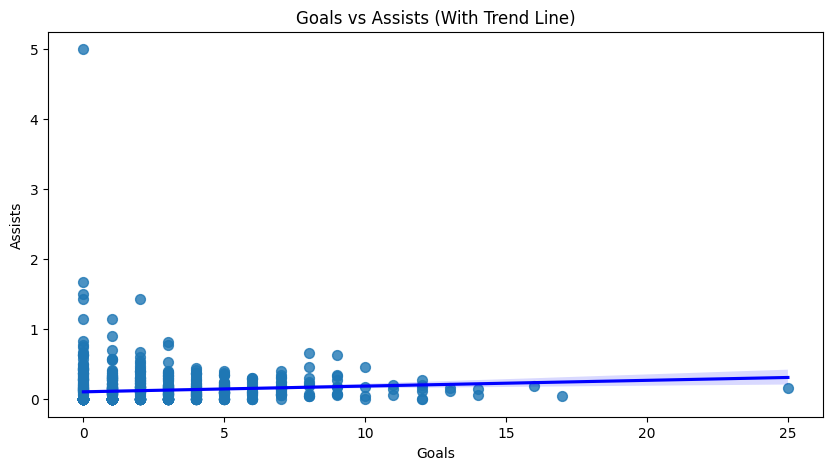

In [ ]:
plt.figure(figsize=(10, 5))
sns.regplot(x='Goals', y='Assists', data=striker_data, scatter_kws={'s':50}, line_kws={"color":"blue"})
plt.title('Goals vs Assists (With Trend Line)')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.show()


###  Dribble Attempts vs Successful Dribbles

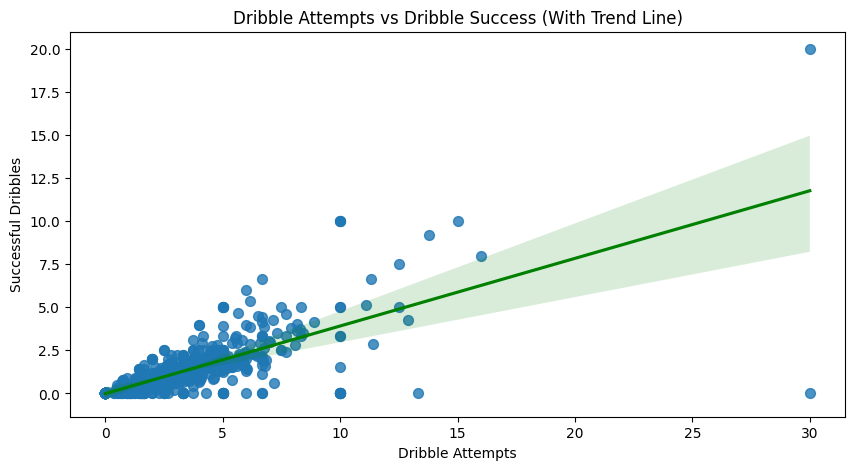

In [ ]:
plt.figure(figsize=(10, 5))
sns.regplot(x='ToAtt', y='ToSuc', data=striker_data, scatter_kws={'s':50}, line_kws={"color":"green"})
plt.title('Dribble Attempts vs Dribble Success (With Trend Line)')
plt.xlabel('Dribble Attempts')
plt.ylabel('Successful Dribbles')
plt.show()


### Minutes Played vs Goals

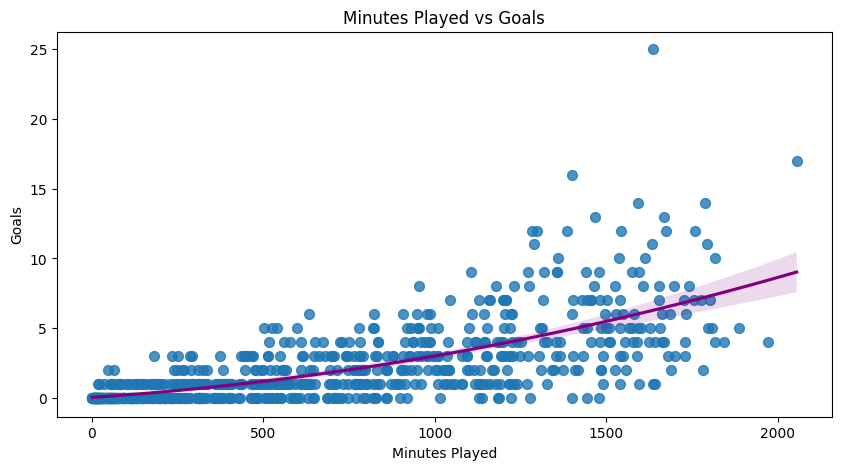

In [ ]:
plt.figure(figsize=(10, 5))
sns.regplot(x='Min', y='Goals', data=striker_data, scatter_kws={'s':50}, line_kws={"color":"purple"}, order=2)
plt.title('Minutes Played vs Goals')
plt.xlabel('Minutes Played')
plt.ylabel('Goals')
plt.show()

### Offside to goal ratio



In [ ]:
data['Off']

,Off
0,0.17
1,0.05
2,0.00
3,0.00
4,0.00
...,...
2684,0.00
2685,0.00
2686,0.05
2687,0.38


In [ ]:
striker_data['Goals_to_Offside_Ratio'] = striker_data['Goals'] / striker_data['Off'].replace(0, np.nan)

top_goals_offside = striker_data.nlargest(5, 'Goals_to_Offside_Ratio')[['Player', 'Goals', 'Off', 'Goals_to_Offside_Ratio']]
top_goals_offside

<ipython-input-42-b55d98584548>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  striker_data['Goals_to_Offside_Ratio'] = striker_data['Goals'] / striker_data['Off'].replace(0, np.nan)


,Player,Goals,Off,Goals_to_Offside_Ratio
1012,Vincenzo Grifo,11,0.07,157.142857
1748,Jamal Musiala,10,0.07,142.857143
1057,Erling Haaland,25,0.27,92.592593
1243,Florian Kainz,5,0.07,71.428571
1494,James Maddison,9,0.14,64.285714


In [ ]:
striker_data['Goals_to_Shots_Ratio'] = striker_data['Goals'] / striker_data['Shots'].replace(0, np.nan)

top_goals_shots = striker_data.nlargest(5, 'Goals_to_Shots_Ratio')[['Player', 'Goals', 'Shots', 'Goals_to_Shots_Ratio']]
top_goals_shots

<ipython-input-43-8bf98a6ecf83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  striker_data['Goals_to_Shots_Ratio'] = striker_data['Goals'] / striker_data['Shots'].replace(0, np.nan)


,Player,Goals,Shots,Goals_to_Shots_Ratio
1057,Erling Haaland,25,3.85,6.493506
788,Breel Embolo,12,1.99,6.030151
1687,Terem Moffi,12,2.14,5.607477
1920,Pedri,5,0.94,5.319149
662,Boulaye Dia,8,1.53,5.228758


In [ ]:
top_assists = striker_data.nlargest(5, 'Assists')[['Player', 'Assists']]
top_assists

,Player,Assists
2544,Gabriel Vidovic,5.00
731,Ckene Doucouré,1.67
325,Badredine Bouanani,1.50
1707,Jon Morcillo,1.43
1772,Reiss Nelson,1.43


In [ ]:
striker_data.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', 'Goals',
       'Shots', 'SoT', 'Assists', 'SCA', 'ScaDrib', 'Off', 'ToAtt', 'ToSuc',
       'Crs', 'Rec', 'Fls', 'CrdY', 'CrdR', 'Goals_to_Offside_Ratio',
       'Goals_to_Shots_Ratio'],
      dtype='object')

In [ ]:
top_dribbles = striker_data.nlargest(5, 'ScaDrib')[['Player', 'ScaDrib']]
top_dribbles

,Player,ScaDrib
700,Malcom Abdulai Ares Djalo,10.00
865,Datro Fofana,10.00
787,Adri Embarba,5.00
1867,Adam Ounas,5.00
318,Yvandro Borges Sanches,3.33


In [ ]:
striker_data['Norm_Goals'] = striker_data['Goals'] / striker_data['Goals'].max()
striker_data['Norm_Assists'] = striker_data['Assists'] / striker_data['Assists'].max()
striker_data['Norm_Shots'] = striker_data['Shots'] / striker_data['Shots'].max()
striker_data['Norm_Dribbles'] = striker_data['ScaDrib'] / striker_data['ScaDrib'].max()
striker_data['Norm_Offsides'] = striker_data['Off'] / striker_data['Off'].max()

striker_data['Efficiency_Score'] = (striker_data['Norm_Goals'] +
                                    striker_data['Norm_Assists'] +
                                    striker_data['Norm_Shots'] +
                                    striker_data['Norm_Dribbles'] -
                                    striker_data['Norm_Offsides'])

top_efficiency = striker_data.nlargest(5, 'Efficiency_Score')[['Player', 'Efficiency_Score', 'Goals', 'Assists', 'Shots', 'ScaDrib', 'Off']]
top_efficiency

<ipython-input-47-a9426b3abed5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  striker_data['Norm_Goals'] = striker_data['Goals'] / striker_data['Goals'].max()
<ipython-input-47-a9426b3abed5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  striker_data['Norm_Assists'] = striker_data['Assists'] / striker_data['Assists'].max()
<ipython-input-47-a9426b3abed5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Player,Efficiency_Score,Goals,Assists,Shots,ScaDrib,Off
700,Malcom Abdulai Ares Djalo,1.666667,0,0.00,10.00,10.00,0.00
865,Datro Fofana,1.333333,0,0.00,5.00,10.00,0.00
1057,Erling Haaland,1.272667,25,0.16,3.85,0.11,0.27
354,Moritz Broschinski,1.040000,1,0.00,15.00,0.00,0.00
2544,Gabriel Vidovic,1.000000,0,5.00,0.00,0.00,0.00


#### Graph the above

<ipython-input-48-59edc8057075>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Goals_to_Offside_Ratio', data=top_goals_offside, palette='viridis')


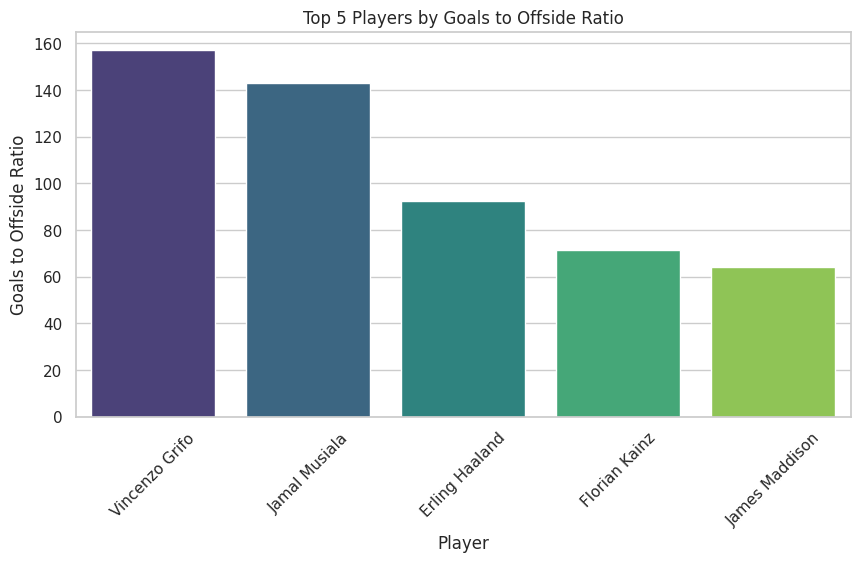

<ipython-input-48-59edc8057075>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Goals_to_Shots_Ratio', data=top_goals_shots, palette='viridis')


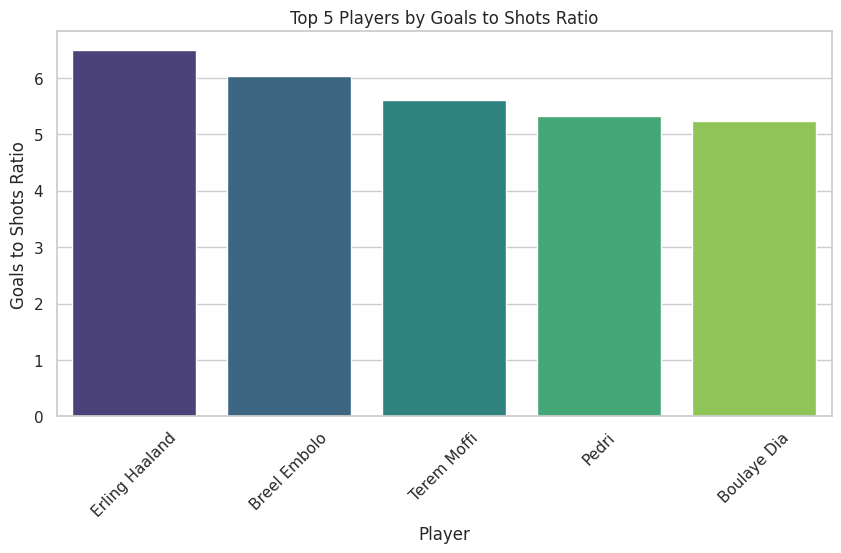

<ipython-input-48-59edc8057075>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Assists', data=top_assists, palette='viridis')


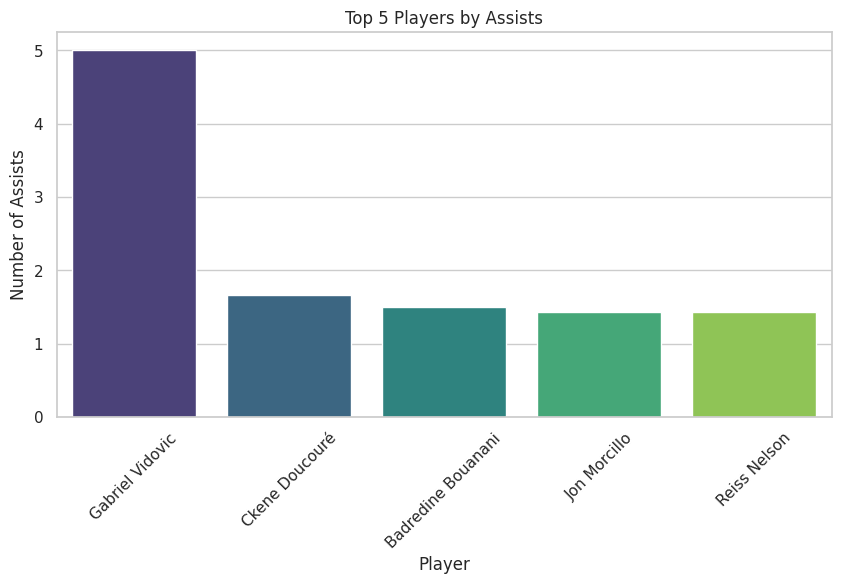

<ipython-input-48-59edc8057075>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='ScaDrib', data=top_dribbles, palette='viridis')


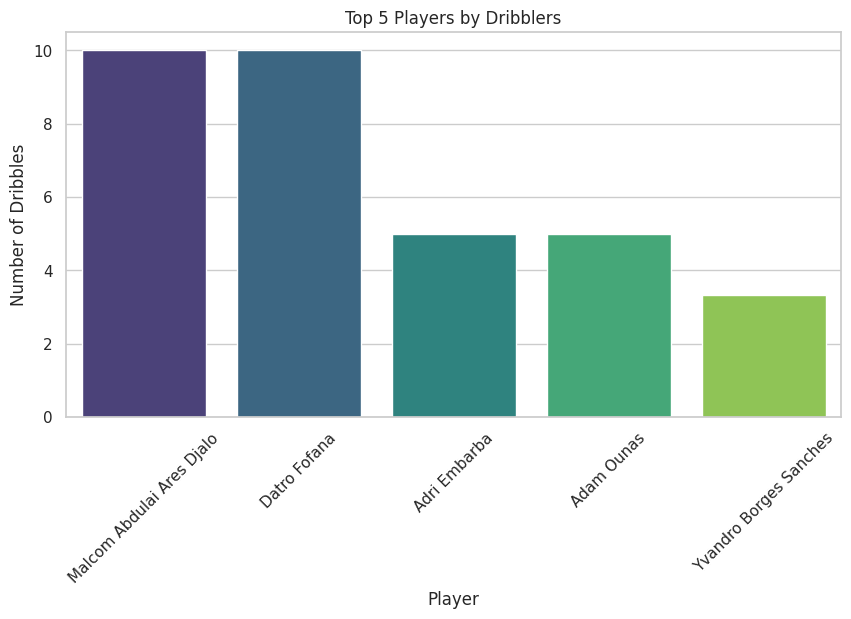

<ipython-input-48-59edc8057075>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Efficiency_Score', data=top_efficiency, palette='viridis')


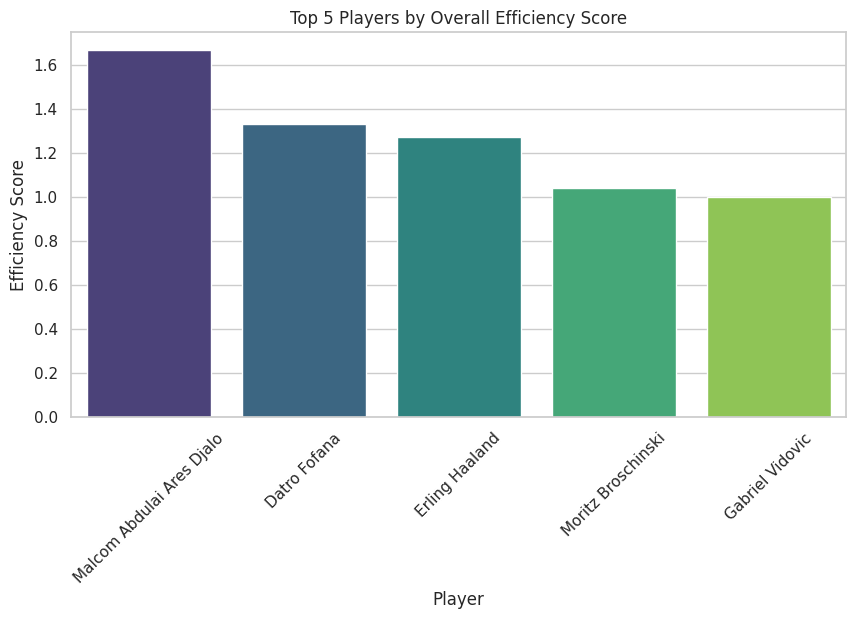

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 5))
sns.barplot(x='Player', y='Goals_to_Offside_Ratio', data=top_goals_offside, palette='viridis')
plt.title('Top 5 Players by Goals to Offside Ratio')
plt.xlabel('Player')
plt.ylabel('Goals to Offside Ratio')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Player', y='Goals_to_Shots_Ratio', data=top_goals_shots, palette='viridis')
plt.title('Top 5 Players by Goals to Shots Ratio')
plt.xlabel('Player')
plt.ylabel('Goals to Shots Ratio')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Player', y='Assists', data=top_assists, palette='viridis')
plt.title('Top 5 Players by Assists')
plt.xlabel('Player')
plt.ylabel('Number of Assists')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Player', y='ScaDrib', data=top_dribbles, palette='viridis')
plt.title('Top 5 Players by Dribblers')
plt.xlabel('Player')
plt.ylabel('Number of Dribbles')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Player', y='Efficiency_Score', data=top_efficiency, palette='viridis')
plt.title('Top 5 Players by Overall Efficiency Score')
plt.xlabel('Player')
plt.ylabel('Efficiency Score')
plt.xticks(rotation=45)
plt.show()


# Phase 2

In [ ]:
cleaned_data.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', 'Goals',
       'Shots', 'SoT', 'Assists', 'SCA', 'ScaDrib', 'Off', 'ToAtt', 'ToSuc',
       'Crs', 'Rec', 'Fls', 'CrdY', 'CrdR', 'PredictedGoals'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### ** Linear Regression**

#### Linear Regression: We are going to predict the goal. based on the following features: 'Shots', 'SoT', 'Assists', 'Min', 'SCA', 'ScaDrib', 'ToAtt', 'ToSuc'

In [ ]:
X = cleaned_data[['Shots', 'SoT', 'Assists', 'Min', 'SCA', 'ScaDrib', 'ToAtt', 'ToSuc']]
y = cleaned_data['Goals']

In [ ]:
X.head(4)

,Shots,SoT,Assists,Min,SCA,ScaDrib,ToAtt,ToSuc
0,2.33,0.49,0.00,931,2.04,0.00,1.65,0.49
1,2.45,0.78,0.00,914,3.43,0.29,3.53,1.08
2,2.15,0.62,0.31,588,3.08,0.31,5.69,2.15
3,1.11,1.11,0.00,78,3.33,0.00,1.11,0.00


In [ ]:
y.head(4)

,Goals
0,2
1,1
2,0
3,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 4.150345309327514
R^2 Score: 0.5198038681656709


###### The following script the ability to write any player name and we will show you what is their expected number of goals for the next season

In [ ]:
def predict_goals(player_name):
    player_data = data[data['Player'] == player_name]
    if player_data.empty:
        return f"Player '{player_name}' do not exist."
    player_features = player_data[['Shots', 'SoT', 'Assists', 'Min', 'SCA', 'ScaDrib', 'ToAtt', 'ToSuc']]
    predicted_goals = model.predict(player_features)
    return f"Predicted goals for {player_name} for the next season: {predicted_goals[0]:.2f}"

In [ ]:
player_name = input("Enter a player name: ")
print(predict_goals(player_name))

Enter a player name: Erling Haaland
Predicted goals for Erling Haaland for the next season: 7.34


In [ ]:
### This is players names if you wanna try the above script.
cleaned_data['Player']

,Player
0,Abdallah Sima
1,Abdelhamid Sabiri
2,Abdessamad Ezzalzouli
3,Abdoul Kader Bamba
4,Abdón Prats
...,...
651,Álvaro Morata
652,Ángel Correa
653,Éderson
654,Érik Lamela


#### Plot Actual vs Predicted Goals. Using Scatter

#### As we can see the there are more points that are

further from the line which means our Model failed to predict some of the players.

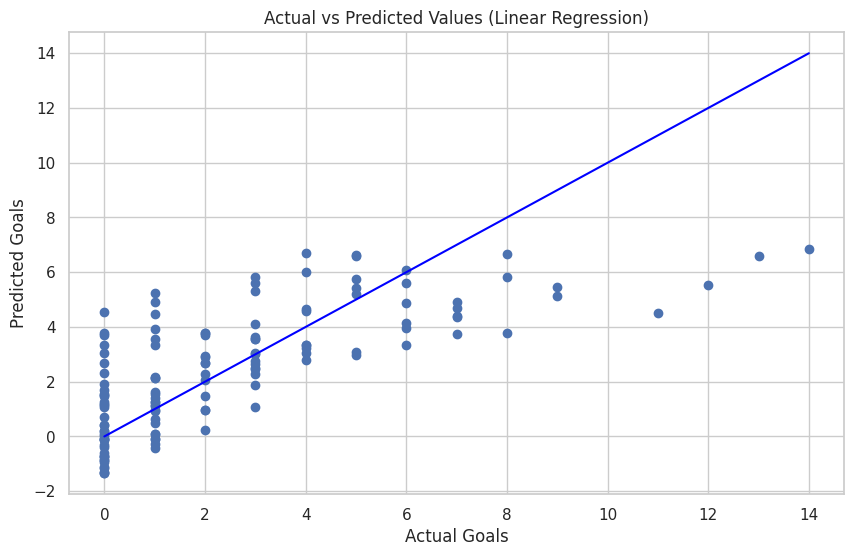

In [ ]:
plt.figure(figsize=(10, 6))
line = np.linspace(min(y_test), max(y_test), 100)

plt.scatter(y_test, y_pred)

plt.plot(line, line, color='blue', linestyle='-')

plt.title('Actual vs Predicted Values (Linear Regression)')

plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')

plt.show()

### K-MEANS

In [ ]:
cleaned_data.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', 'Goals',
       'Shots', 'SoT', 'Assists', 'SCA', 'ScaDrib', 'Off', 'ToAtt', 'ToSuc',
       'Crs', 'Rec', 'Fls', 'CrdY', 'CrdR', 'PredictedGoals'],
      dtype='object')

In [ ]:
cleaned_data['Pos'].unique()

array(['FW', 'MFFW', 'FWMF', 'DFFW', 'FWDF'], dtype=object)

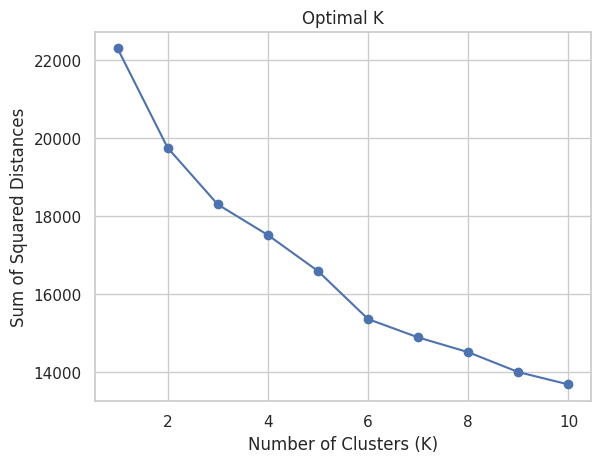

In [ ]:
# Pick the features and positions.
filtered_data = data[data['Pos'].isin(['FW', 'MFFW', 'FWMF', 'DFFW', 'FWDF'])]

features = ['Age', 'MP', 'Starts', 'Min', 'Goals', 'Shots', 'SoT', 'Assists', 'SCA', 'ScaDrib',
            'Off', 'TklW', 'Fls', 'Crs', 'Rec', 'AerWon', 'AerLost', 'AerWon%',
            'PasTotCmp', 'Tkl', 'PasShoCmp%', 'ScaDrib', 'Int', 'Clr']

X = filtered_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pick the right k
k_s = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    k_s.append(kmeans.inertia_)



plt.plot(range(1, 11), k_s, marker='o')
plt.title('Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [ ]:
## WE CAN PICK K=3 AS THE BEST OPTION.
kmeans = KMeans(n_clusters=3, random_state=42)
filtered_data['Cluster'] = kmeans.fit_predict(X_scaled)

print(filtered_data[['Player', 'Pos', 'Cluster']].head())

              Player   Pos  Cluster
0   Brenden Aaronson  MFFW        0
2      Himad Abdelli  MFFW        2
6     Matthis Abline  FWMF        1
7     Matthis Abline  FWMF        1
9  Zakaria Aboukhlal  FWMF        0


<ipython-input-64-6e2db80aa23c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
### SINCE OUR ALGORITHM ISN'T GENERALIZING VERY WELL . WE HAVE DECIDED TO GENERALISE OUR POSITIONS:
# AS MFFW = FWMF , AND DFFW = FWDF .
# first let's use position mapping
# we will split data into training , and test to test later with a real player name and real data.
from sklearn.model_selection import train_test_split


filtered_data = data[data['Pos'].isin(['FW', 'MFFW', 'FWMF', 'DFFW', 'FWDF'])]

position_mapping = {
    'FW': 'FW',
    'MFFW': 'MF',
    'FWMF': 'MF',
    'DFFW': 'DF',
    'FWDF': 'DF'
}
features = ['Age', 'MP', 'Starts', 'Min', 'Goals', 'Shots', 'SoT', 'Assists', 'SCA', 'ScaDrib',
            'Off', 'TklW', 'Fls', 'Crs', 'Rec', 'AerWon', 'AerLost', 'AerWon%',
            'PasTotCmp', 'Tkl', 'PasShoCmp%', 'ScaDrib', 'Int', 'Clr']

X = filtered_data[features]
y = filtered_data['Pos'].map(position_mapping)

player_names = filtered_data['Player']

X_train, X_test, y_train, y_test, player_train, player_test = train_test_split(X, y, player_names, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

y_pred = kmeans.predict(X_test_scaled)

position_mapping_reverse = {0:'MF', 1:'DF', 2:'FW'}

predicted_positions = [position_mapping_reverse[cluster] for cluster in y_pred]
test_results = pd.DataFrame({
    'Player': player_test,
    'Actual Position': y_test,
    'Predicted Position': predicted_positions
})

print(test_results.head())

accuracy = (test_results['Actual Position'] == test_results['Predicted Position']).mean()
print(f"Accuracy of the kmeans: {accuracy * 100:.2f}%")

                     Player Actual Position Predicted Position
2163            Bukayo Saka              FW                 MF
1884  Isaac Palazón Camacho              MF                 MF
83                    Amath              MF                 DF
1125            Lucas Höler              MF                 FW
563          Conor Coventry              MF                 FW
Accuracy of the kmeans: 45.70%


In [ ]:
test_results

,Player,Actual Position,Predicted Position
2163,Bukayo Saka,FW,MF
1884,Isaac Palazón Camacho,MF,MF
83,Amath,MF,DF
1125,Lucas Höler,MF,FW
563,Conor Coventry,MF,FW
...,...,...,...
1165,Danny Ings,FW,FW
10,Tammy Abraham,FW,MF
138,Pierre-Emerick Aubameyang,FW,FW
1053,Darko Gyabi,FW,DF


#### Let's visualise it.

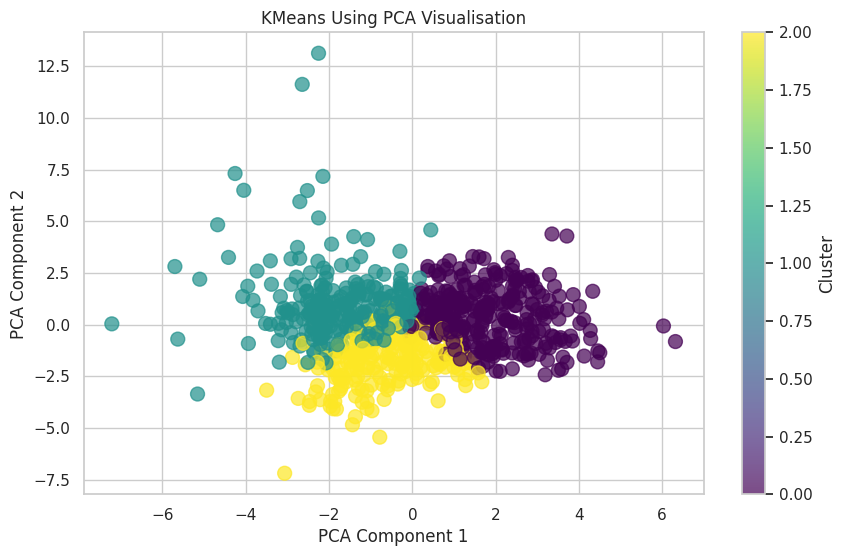

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

kmeans_pca = kmeans.predict(X_train_scaled)

plt.figure(figsize=(10, 6))

scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_pca, cmap='viridis', s=100, alpha=0.7)

plt.colorbar(scatter, label='Cluster')
plt.title('KMeans Using PCA Visualisation')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()

explained_variance = pca.explained_variance_ratio_


#### Write a name of any player and it will show you his actual position and predicted one based on the stats.

In [ ]:
def predict_position(player_name):
    player_data = test_results[test_results['Player'] == player_name]

    if player_data.empty:
        return f"Player '{player_name}' does not exist in the test set."

    actual_position = player_data['Actual Position'].values[0]
    predicted_position = player_data['Predicted Position'].values[0]

    return f"Player '{player_name}' has Actual Position: {actual_position} and Predicted Position: {predicted_position}"


In [ ]:
player_name = "Lucas Höler"
print(predict_position(player_name))

Player 'Lucas Höler' has Actual Position: MF and Predicted Position: FW


#KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [170]:
position_mapping = {
    'FW': 'FW',
    'MFFW': 'MF',
    'FWMF': 'MF',
    'DFFW': 'DF',
    'FWDF': 'DF'
}

features = ['Age', 'MP', 'Starts', 'Min', 'Goals', 'Shots', 'SoT', 'Assists', 'SCA', 'ScaDrib',
            'Off', 'TklW', 'Fls', 'Crs', 'Rec', 'AerWon', 'AerLost', 'AerWon%',
            'PasTotCmp', 'Tkl', 'PasShoCmp%', 'ScaDrib', 'Int', 'Clr']
X = filtered_data[features]
y = filtered_data['Pos'].map(position_mapping)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.6379928315412187
Precision: 0.6344007550331029
Recall: 0.6379928315412187
F1 Score: 0.6330901444482627

Classification Report:
               precision    recall  f1-score   support

          DF       0.23      0.16      0.19        19
          FW       0.61      0.72      0.66       117
          MF       0.71      0.64      0.67       143

    accuracy                           0.64       279
   macro avg       0.52      0.50      0.51       279
weighted avg       0.63      0.64      0.63       279

Confusion Matrix:
 [[ 3  5 11]
 [ 6 84 27]
 [ 4 48 91]]


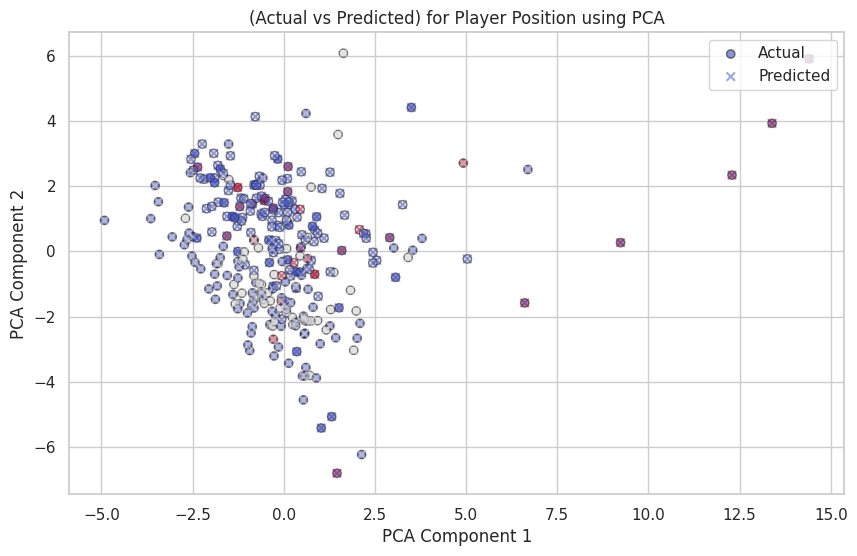

In [171]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y_test)[0], cmap='coolwarm', label='Actual', alpha=0.6, edgecolor='k')

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y_pred)[0], cmap='coolwarm', marker='x', label='Predicted', alpha=0.5)

plt.title("(Actual vs Predicted) for Player Position using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc="upper right")
plt.show()


# SVM

In [ ]:
from sklearn.svm import SVR

filtered_data = data[data['Pos'].isin(['FW', 'MFFW', 'FWMF', 'DFFW', 'FWDF'])]

features = ['Age', 'MP', 'Starts', 'Min', 'Goals', 'Shots', 'SoT', 'Assists', 'SCA', 'ScaDrib',
            'Off', 'TklW', 'Fls', 'Crs', 'Rec', 'AerWon', 'AerLost', 'AerWon%',
            'PasTotCmp', 'Tkl', 'PasShoCmp%', 'ScaDrib', 'Int', 'Clr']

X = filtered_data[features]
y = filtered_data['Goals']

X_train, X_test, y_train, y_test, player_train, player_test = train_test_split(
    X, y, filtered_data['Player'], test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
# PREDICT USING SCALED X_TEST
y_pred = svr.predict(X_test_scaled)

# The following to see the performance of our SVM Model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.23
R^2 Score: 0.96


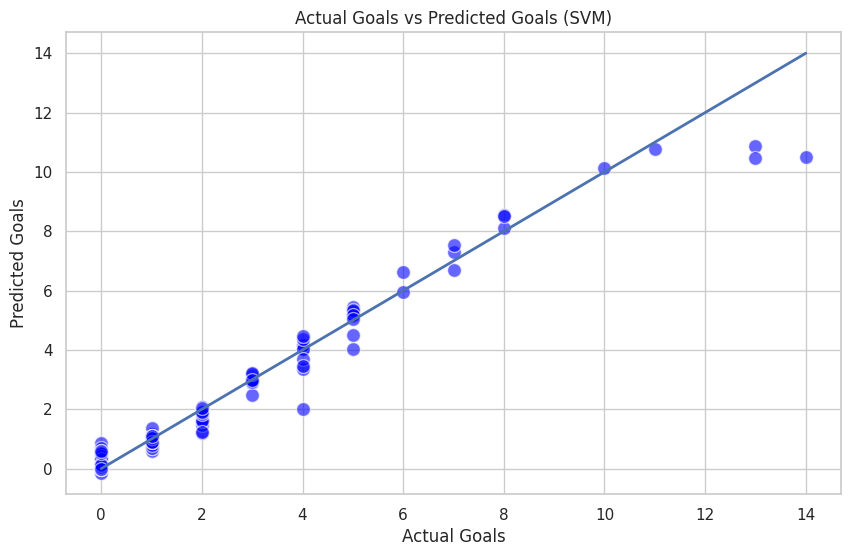

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors="w", s=100)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-', lw=2)

plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.title('Actual Goals vs Predicted Goals (SVM)')

plt.show()


In [ ]:
new_cleaned = cleaned_data.drop(columns='Player')

X = new_cleaned.drop(columns='Goals')
y = cleaned_data['Goals']


# Decision Tree

Decision Tree Accuracy: 47.85% 

Decision Tree Classification Report:
               precision    recall  f1-score   support

        DFFW       0.25      0.50      0.33         4
          FW       0.59      0.62      0.61        82
        FWDF       0.00      0.00      0.00         5
        FWMF       0.40      0.38      0.39        56
        MFFW       0.45      0.38      0.42        39

    accuracy                           0.48       186
   macro avg       0.34      0.38      0.35       186
weighted avg       0.48      0.48      0.48       186



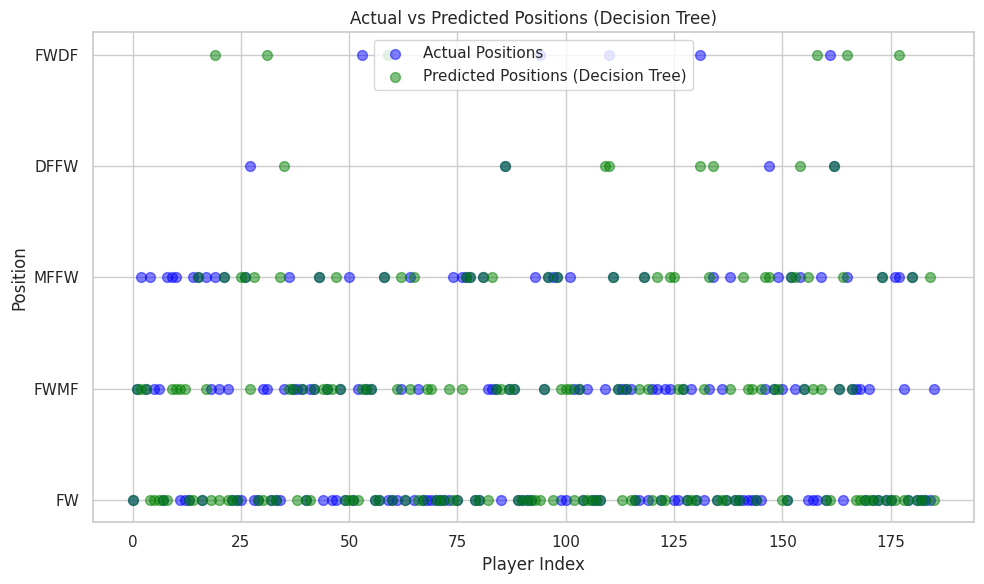

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

filtered_data = data[data['Pos'].isin(['FW', 'MFFW', 'FWMF', 'DFFW', 'FWDF'])]

features = ['Age', 'MP', 'Starts', 'Min', 'Goals', 'Shots', 'SoT', 'Assists', 'SCA', 'ScaDrib',
            'Off', 'TklW', 'Fls', 'Crs', 'Rec', 'AerWon', 'AerLost', 'AerWon%',
            'PasTotCmp', 'Tkl', 'PasShoCmp%', 'ScaDrib', 'Int', 'Clr']

X = filtered_data[features]
y = filtered_data['Pos']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test, player_train, player_test = train_test_split(
    X, y_encoded, filtered_data['Player'], test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}% \n')
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_dt_labels = label_encoder.inverse_transform(y_pred_dt)

x_pos = range(len(y_test_labels))

plt.figure(figsize=(10, 6))

plt.scatter(x_pos, y_test_labels, color='blue', alpha=0.5, label='Actual Positions', s=50)
plt.scatter(x_pos, y_pred_dt_labels, color='green', alpha=0.5, label='Predicted Positions (Decision Tree)', s=50)

plt.title('Actual vs Predicted Positions (Decision Tree)')
plt.xlabel('Player Index')
plt.ylabel('Position')
plt.legend()

plt.tight_layout()
plt.show()


# XGBOOST

XGBoost Mean Squared Error: 0.01
XGBoost R² Score: 0.84


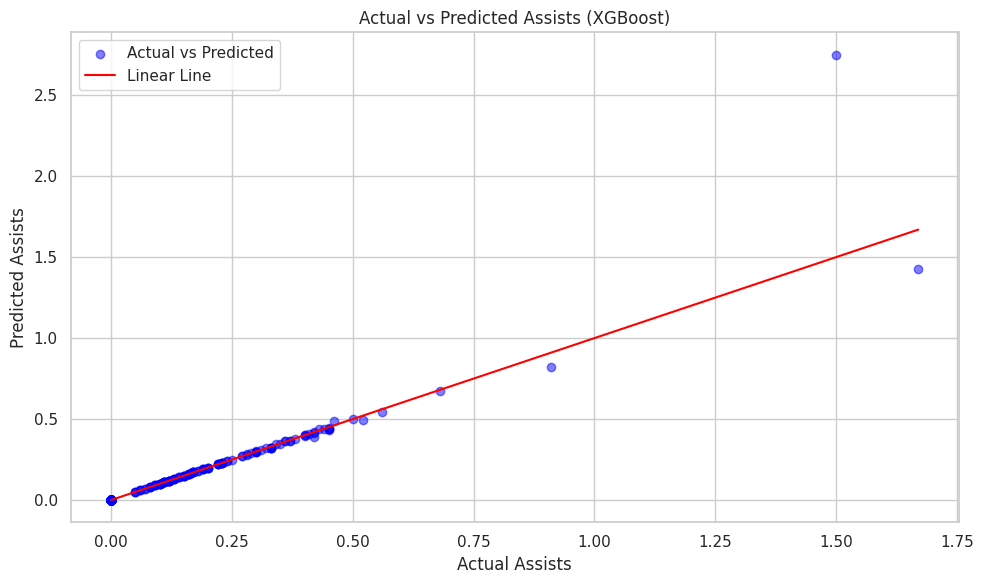

In [166]:
features = ['Age', 'MP', 'Starts', 'Min', 'Goals', 'Shots', 'SoT', 'Assists', 'SCA', 'ScaDrib',
            'Off', 'TklW', 'Fls', 'Crs', 'Rec', 'AerWon', 'AerLost', 'AerWon%',
            'PasTotCmp', 'Tkl', 'PasShoCmp%', 'ScaDrib', 'Int', 'Clr']

X = filtered_data[features]
y = filtered_data['Assists']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {mse:.2f}')
print(f'XGBoost R² Score: {r2:.2f}')

line = np.linspace(min(y_test), max(y_test), 100)

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.5, label='Actual vs Predicted')

plt.plot(line, line, color='red', linestyle='-', label='Linear Line')

plt.title('Actual vs Predicted Assists (XGBoost)')
plt.xlabel('Actual Assists')
plt.ylabel('Predicted Assists')
plt.legend()

plt.tight_layout()
plt.show()

## References:
- https://www.coursera.org/articles/machine-learning-algorithms
- https://xgboost.readthedocs.io/en/latest/tutorials/model.html
- https://scikit-learn.org/1.5/modules/tree.html
- https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html
